## Used Car Price Prediction

If user can predict the price of the car based on input features. 

Prediction results can be used to give new seller the price suggestion based on market condition.

### Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

**Import data as a pandas Dataframe**

In [42]:
df = pd.read_csv('data/cardekho_dataset.csv', index_col=[0])

**Top 5 records**

In [43]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


**Shape of Dataset**

In [44]:
df.shape

(15411, 13)

**Summary of dataset**

In [45]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


**Datatypes of features**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


## Exploring Data

In [67]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"we have {len(numerical_features)} features and they are : {numerical_features}")
print(f"we have {len(categorical_features)} features and they are : {categorical_features}")

we have 7 features and they are : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
we have 6 features and they are : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


### Feature Information

- **car_name**: Car's Full name, which includes brand and specific model name.
- **brand**: Brand Name of the particular car.
- **model**: Exact model name of the car of a particular brand.
- **seller_type**: Which Type of seller is selling the used car
- **fuel_type**: Fuel used in the used car, which was put up on sale.
- **transmission_type**: Transmission used in the used car, which was put on sale.
- **vehicle_age**: The count of years since car was bought.
- **mileage**: It is the number of kilometer the car runs per litre.
- **engine**: It is the engine capacity in cc(cubic centimeters)
- **max_power**: Max power it produces in BHP.
- **seats**: Total number of seats in car.
- **selling_price**: The sale price which was put up on website.

In [49]:
# Proportion of each unique values of categorical column 
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Maserati Quattroporte    0.006489
Isuzu MUX                0.006489
Force Gurkha             0.006489
Name: proportion, Length: 121, dtype: float64
---------------------------
brand
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.1297

## Univariate Analysis

### Numerical Variables

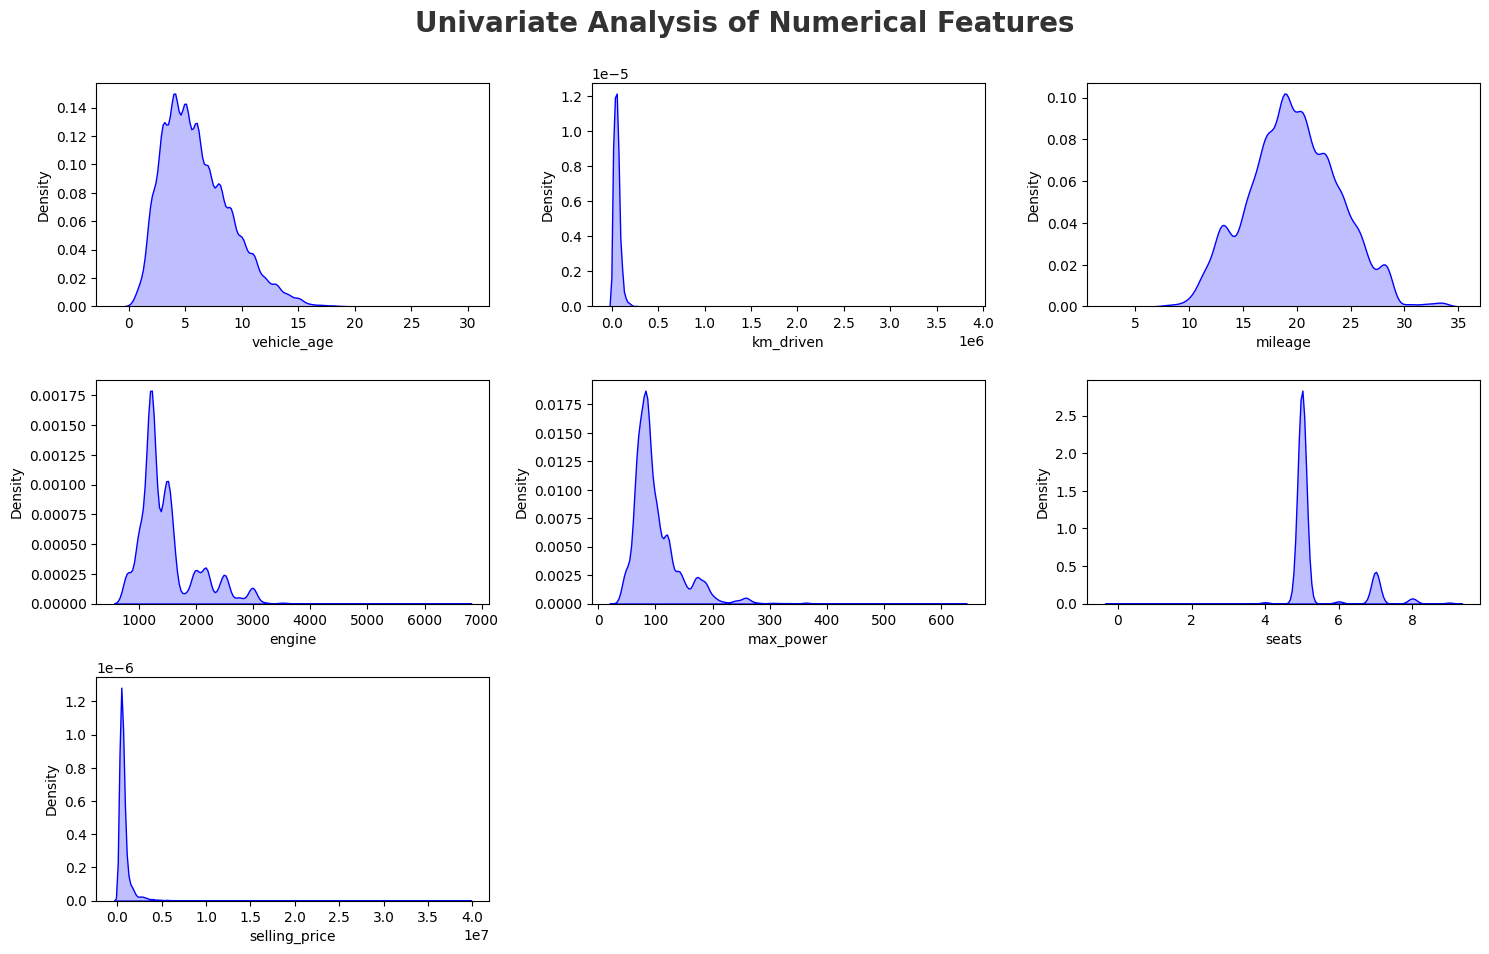

In [51]:
plt.figure(figsize = (15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]], shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Report**
- Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
- Outliers in km_driven, engine, selling_price, and max power.

### Categorical Features

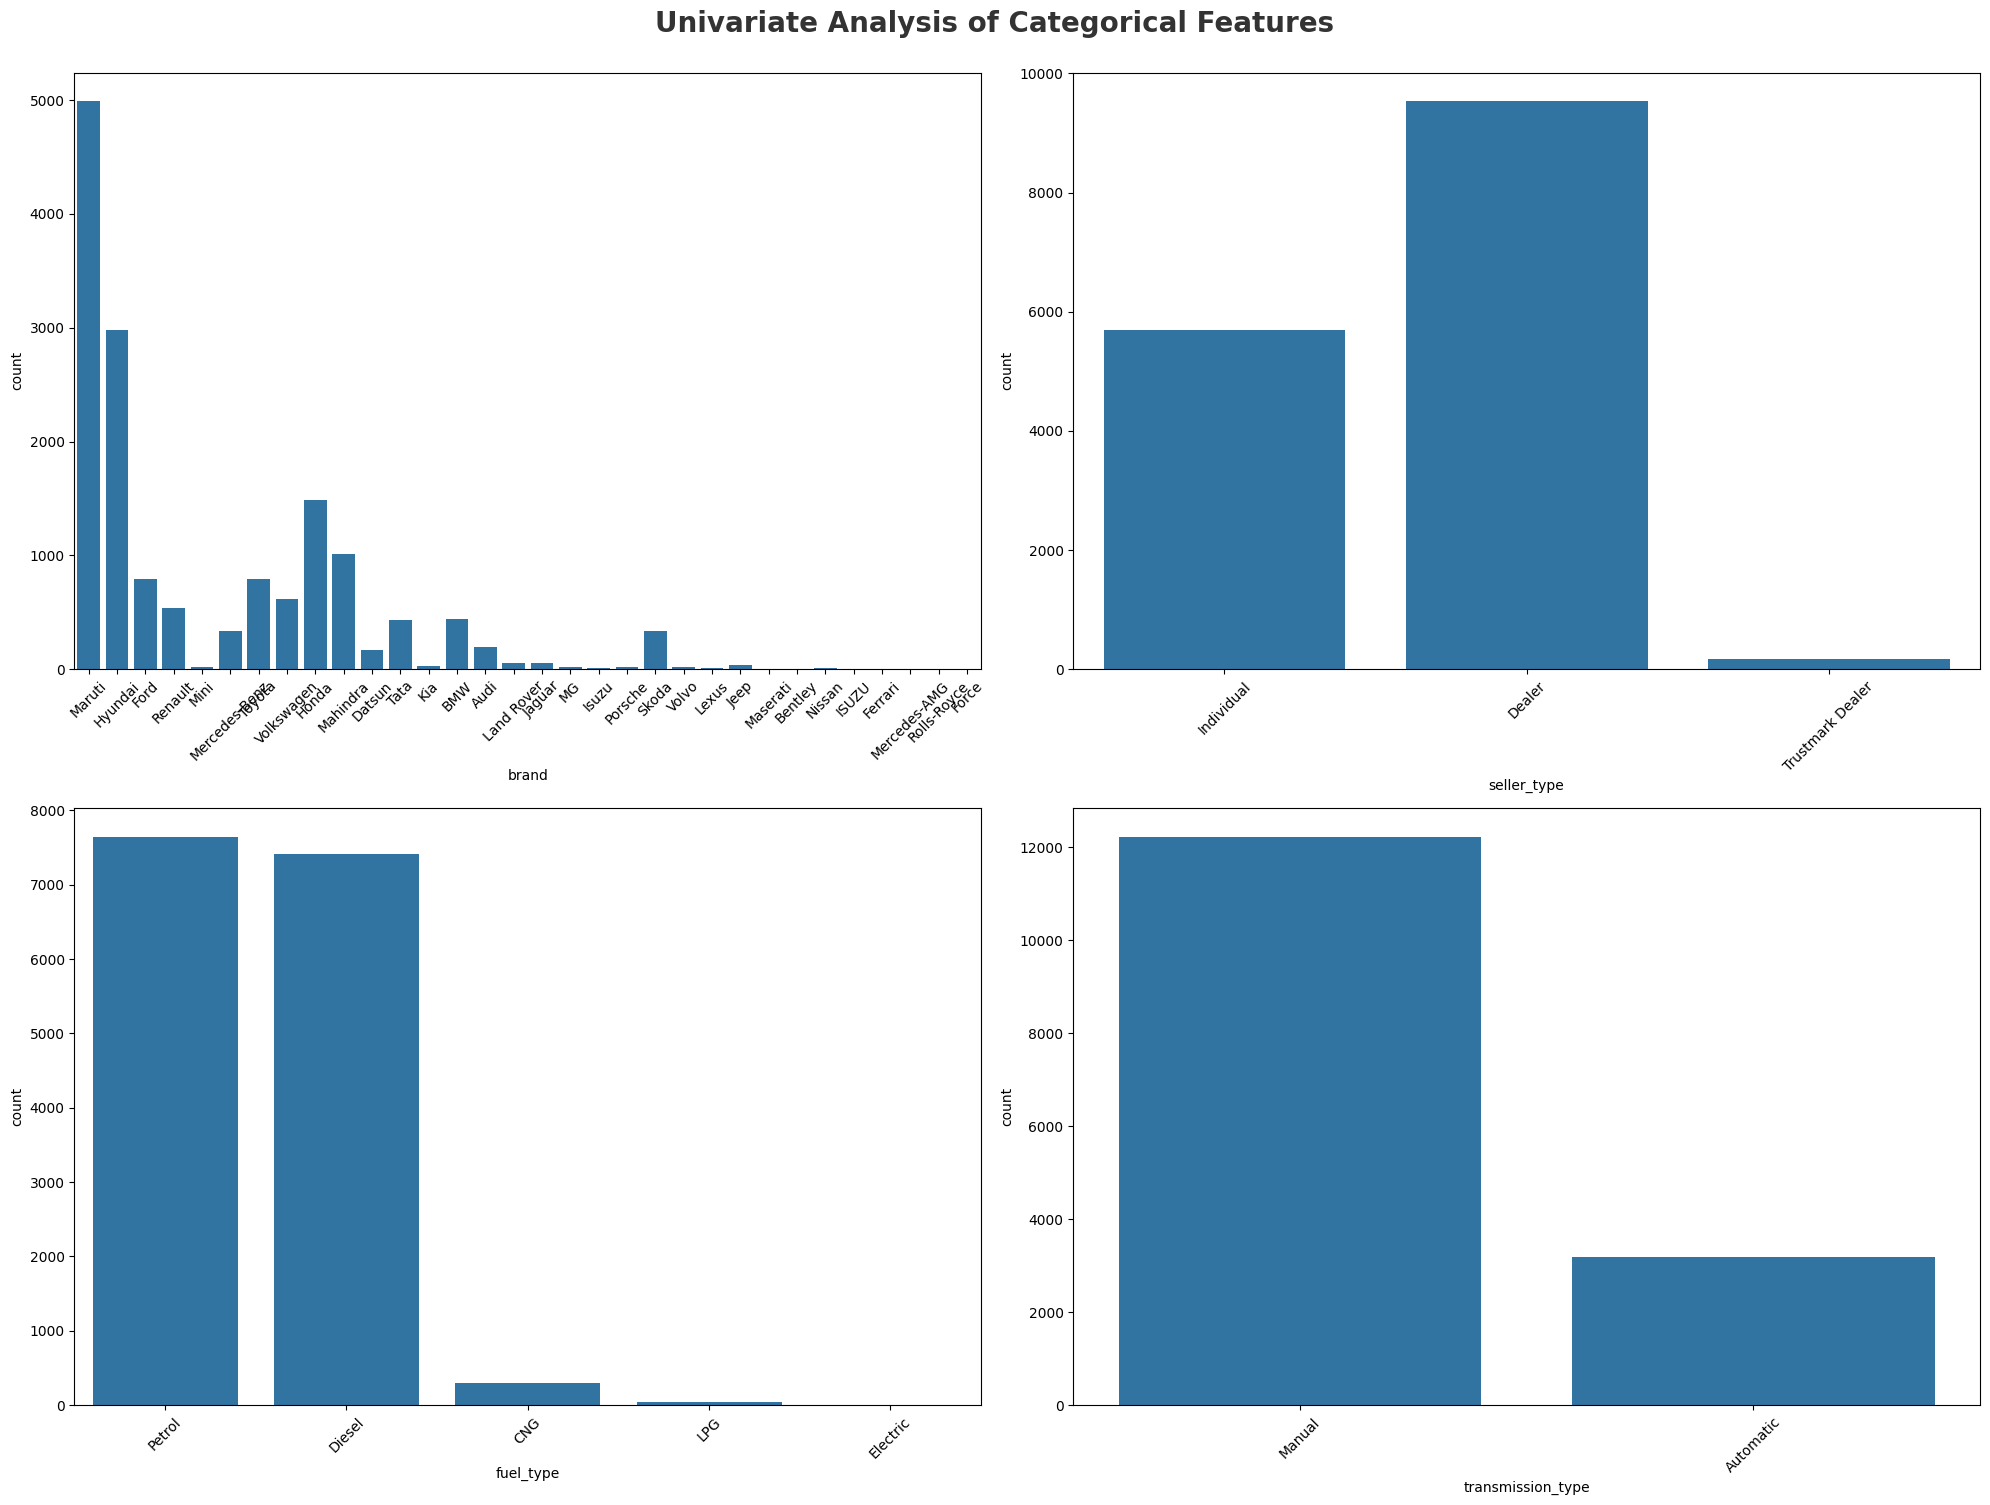

In [ ]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
# not visualizing categories with too many categories
cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

### Check multicollinearity in numerical features

In [57]:
df[numerical_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


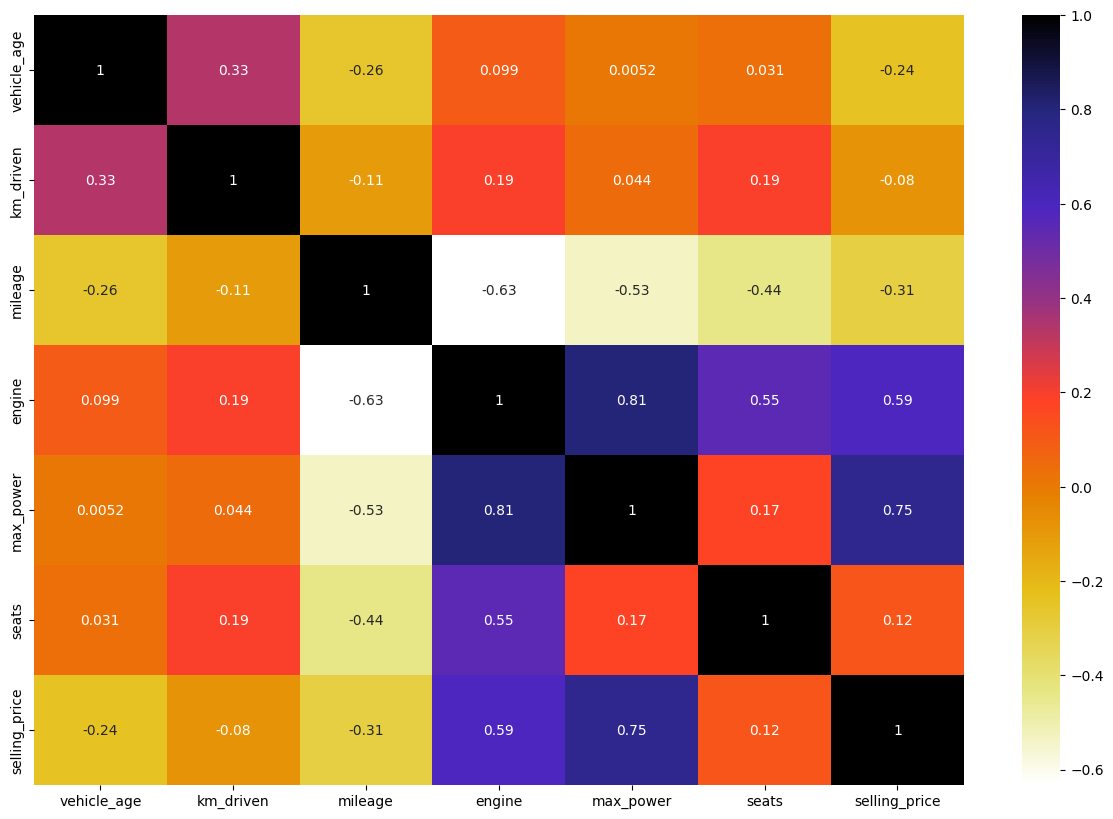

In [58]:
plt.figure(figsize = (15,10))
sns.heatmap(df[numerical_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

**Report**
 - `Mileage` and `engine` are negatively corelated
 - `Maxpower` and `selling_price` are highly positively corelated
 - `Km_driven` has the least corelation with `selling_price`

### Visualizing mean selling price WRT every categorical column

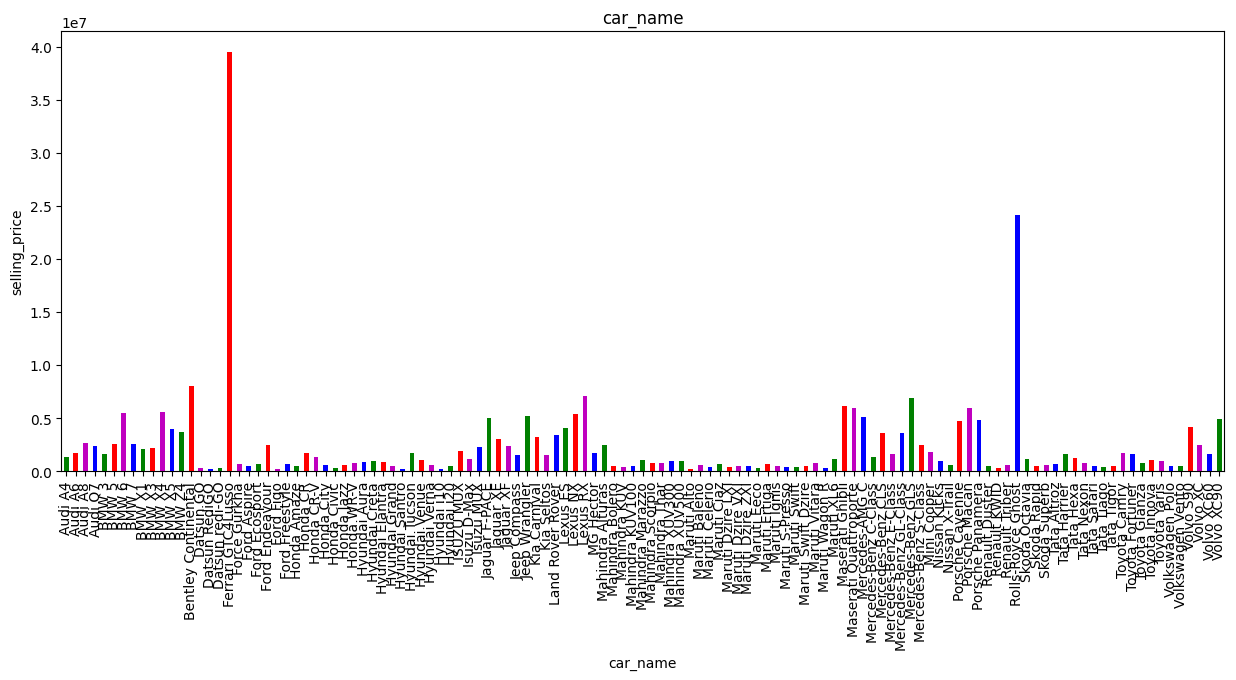

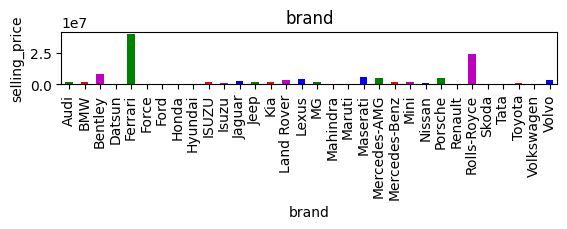

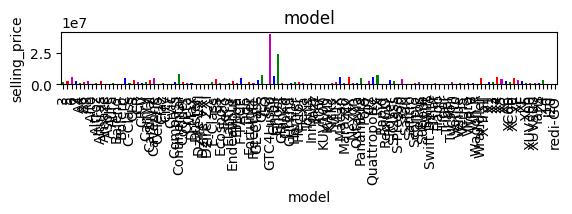

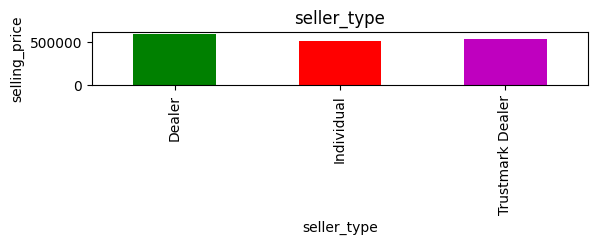

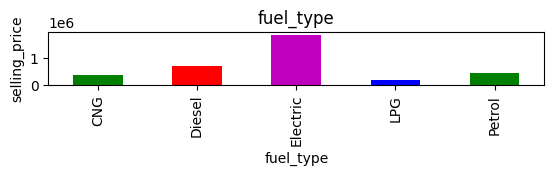

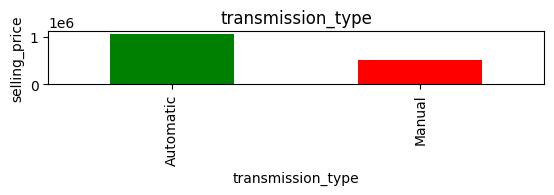

In [72]:
plt.figure(figsize=(15, 40))
colors = ['g', 'r', 'm', 'b']
for feature in categorical_features:
    data = df.copy()
    plt.subplot(6,1,i+1)
    data.groupby(feature)['selling_price'].median().plot.bar(color=colors)
    plt.xlabel(feature)
    plt.ylabel('selling_price')
    plt.title(feature)
    plt.show()

**Report**

Each Categorical features have different means WRT selling price which implies that each features have significant effiect on the selling price.

### Continous features 

In [73]:
continuous_features=[feature for feature in numerical_features if len(df[feature].unique())>=30]
print('Num of continues features :',continuous_features)

Num of continues features : ['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


ValueError: num must be an integer with 1 <= num <= 4, not 5

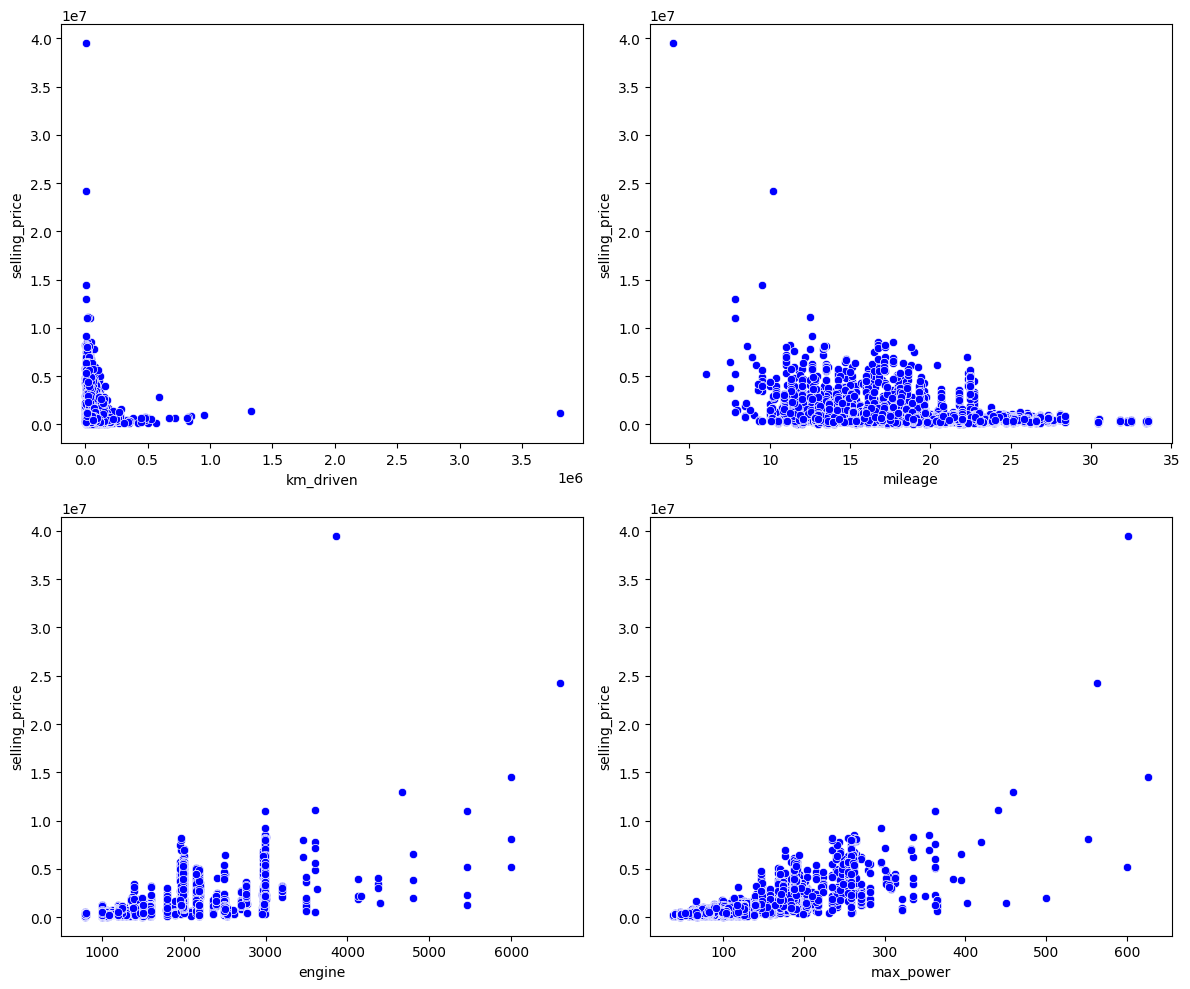

In [74]:
fig = plt.figure(figsize=(12, 10))

for i in range(len(continuous_features)):
    ax = plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, y='selling_price', x=continuous_features[i], color='b')
    plt.tight_layout()

## Initial Analysis Report
**Report**
 - `Lower Vehicle age` has more selling price than `Vehicle with more age`.
 - `Engine CC` has positive effect on price, Vehicle with 2000 cc and below are mostly priced below 5lakh.
 - `Kms Driven` has negative effect on `selling_price`.
 - `Vehicle Age` has negative effect on `selling_price`
 - No Null values in the dataset

## Visualization
### Target Feature Visualization

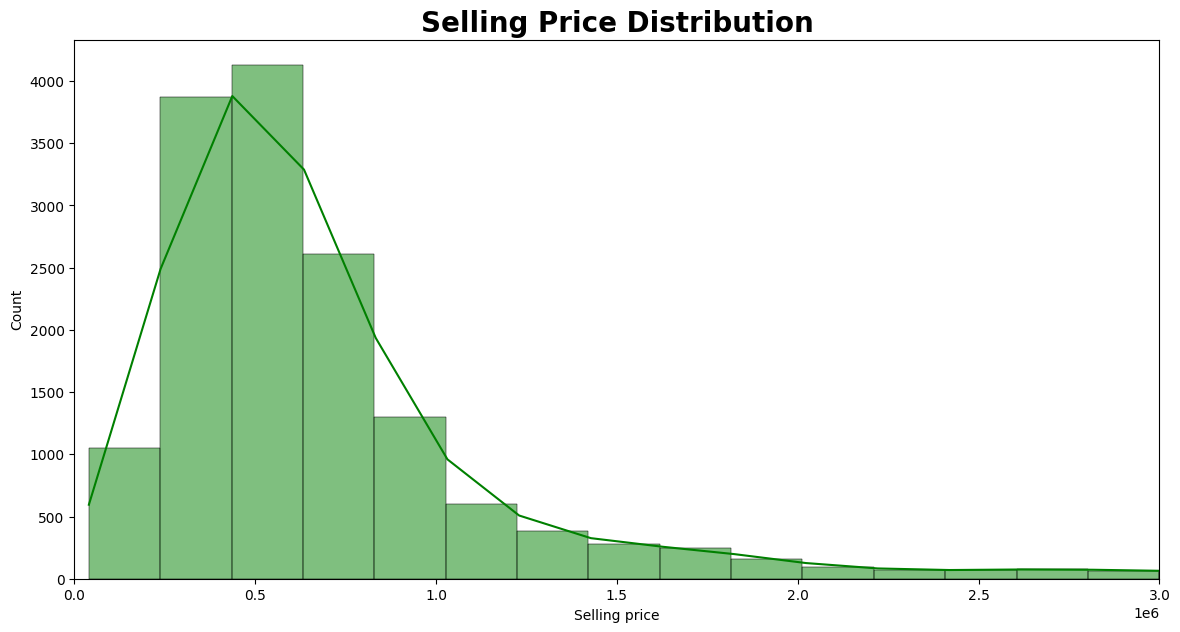

In [76]:
plt.subplots(figsize=(14, 7))
sns.histplot(df['selling_price'], bins=200, kde=True, color='g')
plt.title("Selling Price Distribution", weight='bold', fontsize=20)
plt.ylabel("Count")
plt.xlabel("Selling price")
plt.xlim(0, 3000000)
plt.show()

Skewed target variable

### Which is the most selling car ??

In [77]:
df.car_name.value_counts()[0:10]

car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

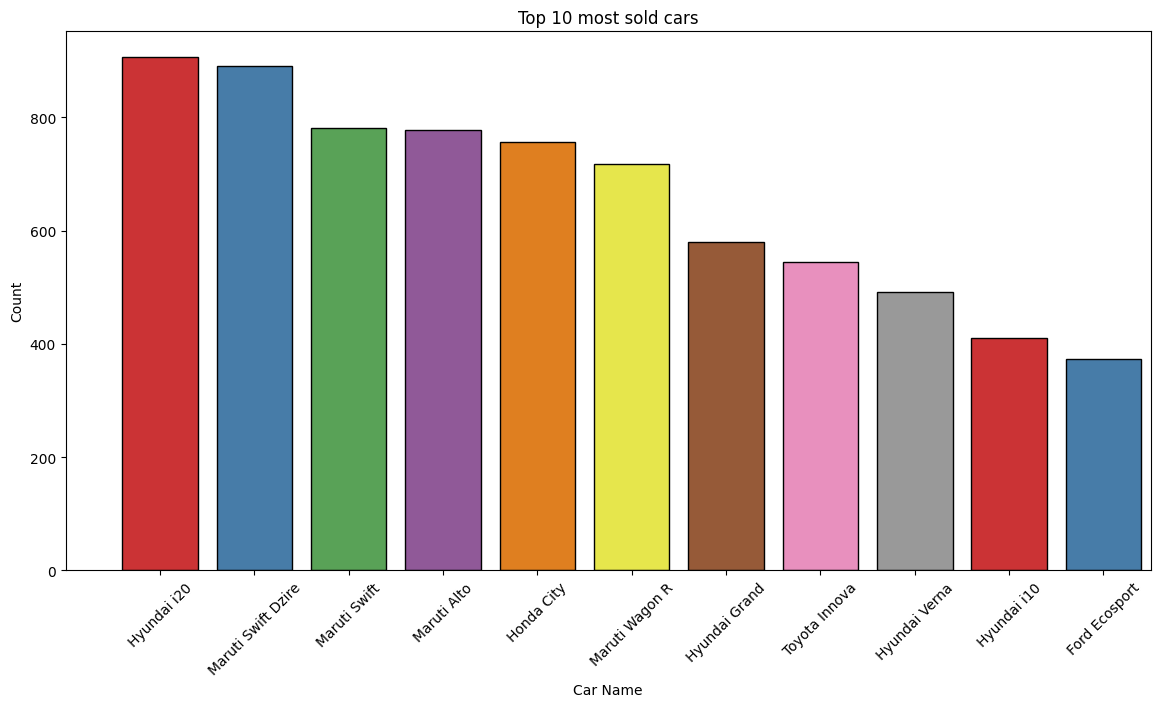

In [83]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data = df, ec="black", palette="Set1", order=df["car_name"].value_counts().index)
plt.title("Top 10 most sold cars")
plt.ylabel("Count")
plt.xlabel("Car Name")
plt.xticks(rotation=45)
plt.xlim(-1, 10.5)
plt.show()

### Mean Hyundai i20 price

In [85]:
i20 = df[df["car_name"] == "Hyundai i20"]["selling_price"].mean()
print(f"Mean i20 price = {i20:.2f}")


Mean i20 price = 543603.75


**Report:**

- The above chart shows the top 10 most selling cars.
- Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
- Mean Price of Most Sold Car is 540 k Rupees.
- This Feature has impact on the Target Variable.

### Most selling Brand

In [88]:
df["brand"].value_counts()[0:10]

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

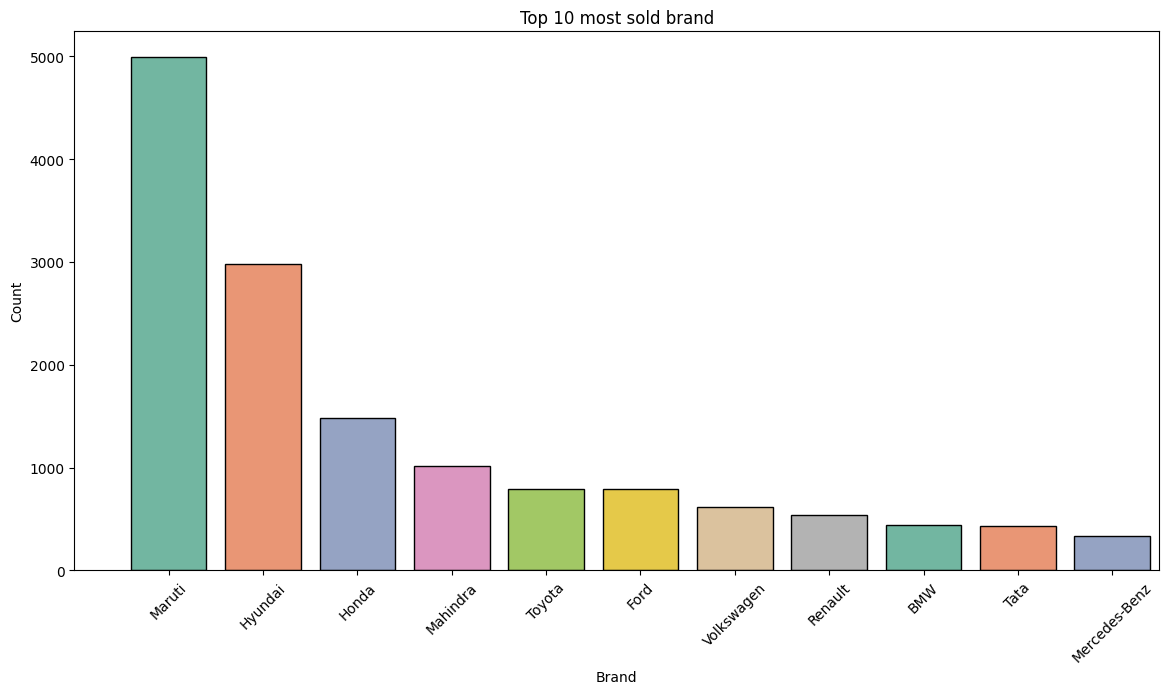

In [90]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data = df, ec="black", palette="Set2", order=df["brand"].value_counts().index)
plt.title("Top 10 most sold brand")
plt.ylabel("Count")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.xlim(-1, 10.5)
plt.show()

### Mean Maruti brand price

In [92]:
maruti = df[df["brand"] == "Maruti"]["selling_price"].mean()
print(f"Mean price of a maruti car = {maruti:.2f}")

Mean price of a maruti car = 487089.32


**Report:**

 - Maruti is the most sold brand.
 - Following Maruti we have Hyundai and Honda.
 - Mean Price of Maruti Brand is 480K Rupees.

### Costliest Brand and Costliest Car

In [93]:
brand = df.groupby('brand')['selling_price'].max()
brand_df = brand.to_frame().sort_values('selling_price', ascending=False)[0:10]
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


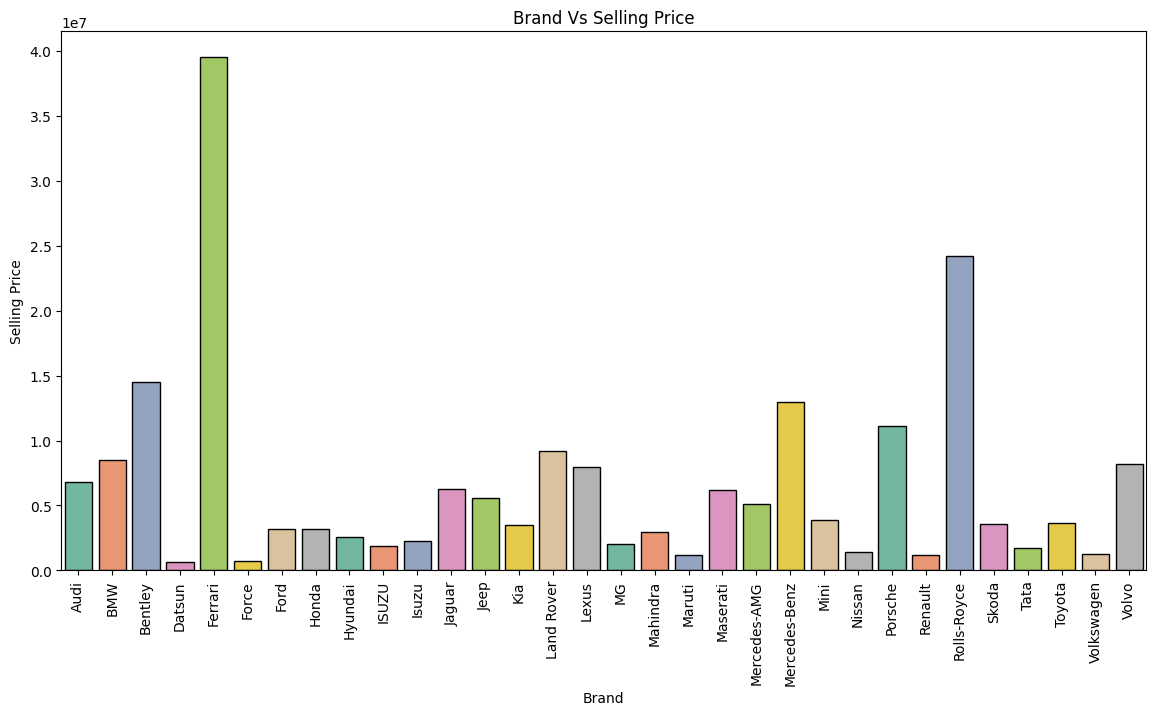

In [94]:
plt.subplots(figsize=(14, 7))
sns.barplot(x = brand.index, y=brand.values, ec="black", palette="Set2")
plt.title("Brand Vs Selling Price")
plt.xlabel("Brand")
plt.ylabel("Selling Price")
plt.xticks(rotation=90)
plt.show()

**Report:**

 - Costliest Brand sold is Ferrari at 39.5 Million.
 - Second most costliest car Brand is Rolls-Royce as 24.2 Million.
 - Brand name has very clear impact on selling price.

### Costliest Car

In [105]:
car = df.groupby('car_name')['selling_price'].max()
car_df = car.to_frame().sort_values('selling_price', ascending=False)[0:10]
car_df


,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


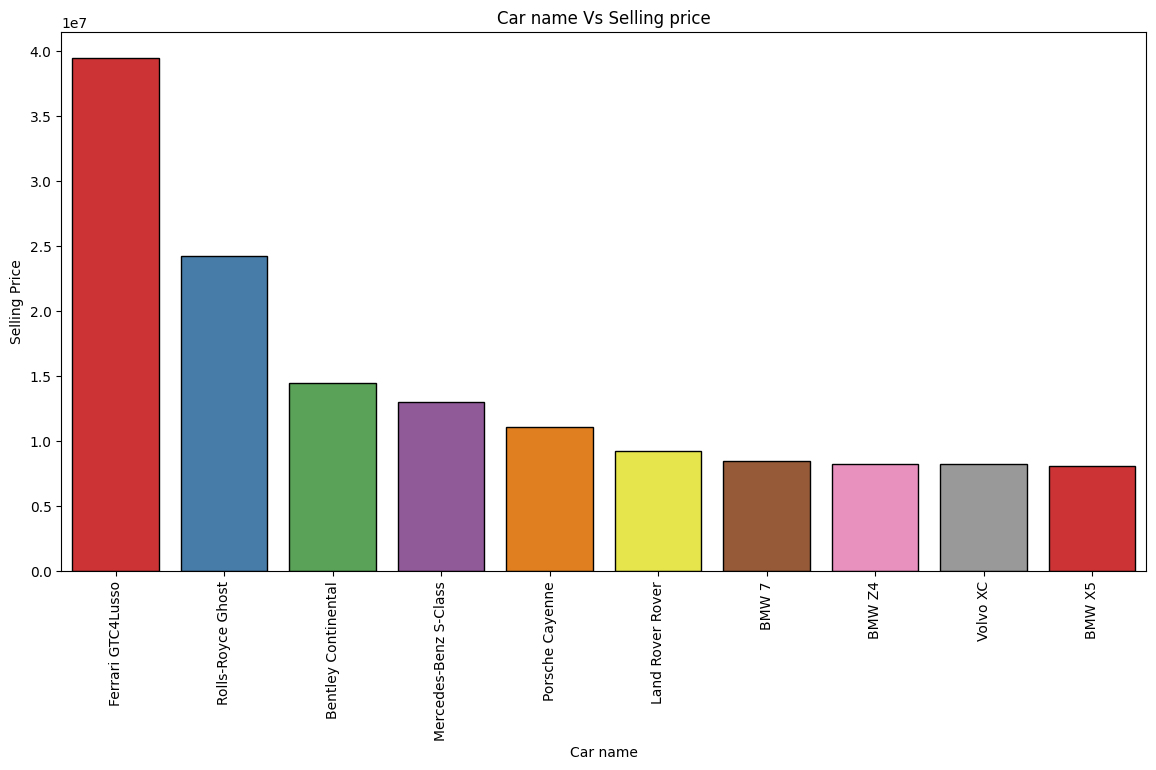

In [108]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car_df.index, y=car_df['selling_price'], ec="Black", palette="Set1")
plt.title("Car name Vs Selling price")
plt.xlabel("Car name")
plt.ylabel("Selling Price")
plt.xticks(rotation=90)
plt.show()

### Brand with most mileage

In [110]:
mileage = df.groupby('brand')['mileage'].mean().sort_values(ascending=False)[0:15]
mileage.to_frame()

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


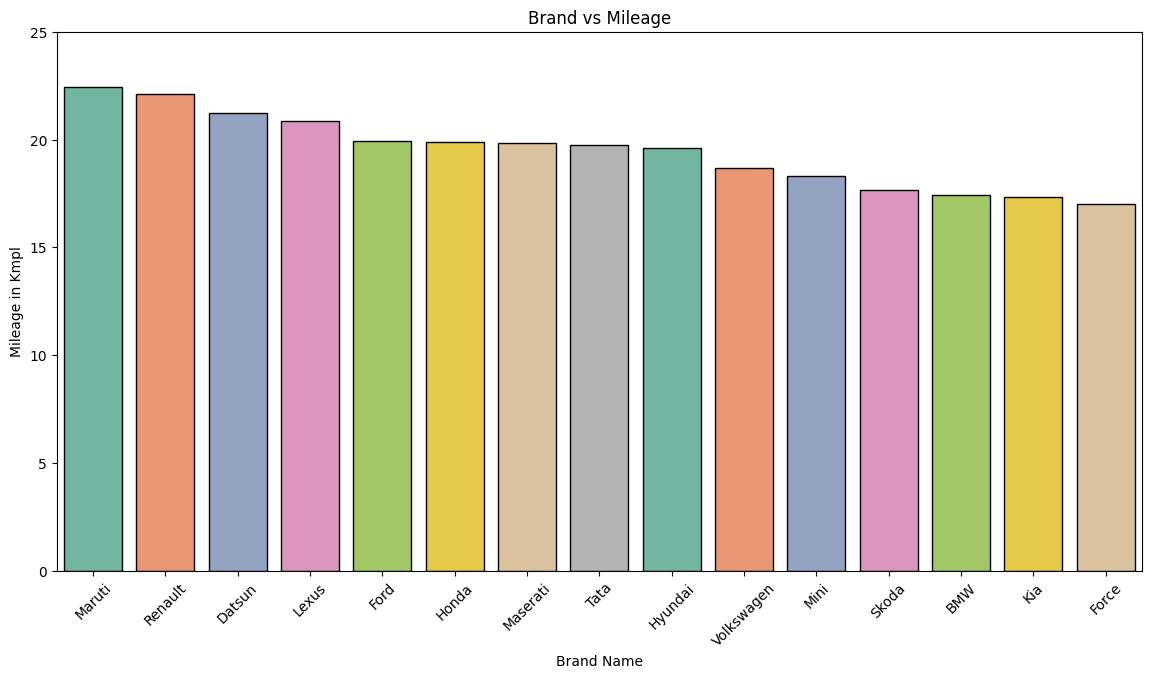

In [111]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage")
plt.ylabel("Mileage in Kmpl")
plt.xlabel("Brand Name")
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

### Car with highest mileage

In [112]:
car_mileage = df.groupby('car_name')['mileage'].mean().sort_values(ascending=False)[0:10]
car_mileage.to_frame()

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire ZXI,23.260000
Maruti Dzire LXI,23.260000
Ford Aspire,22.993846


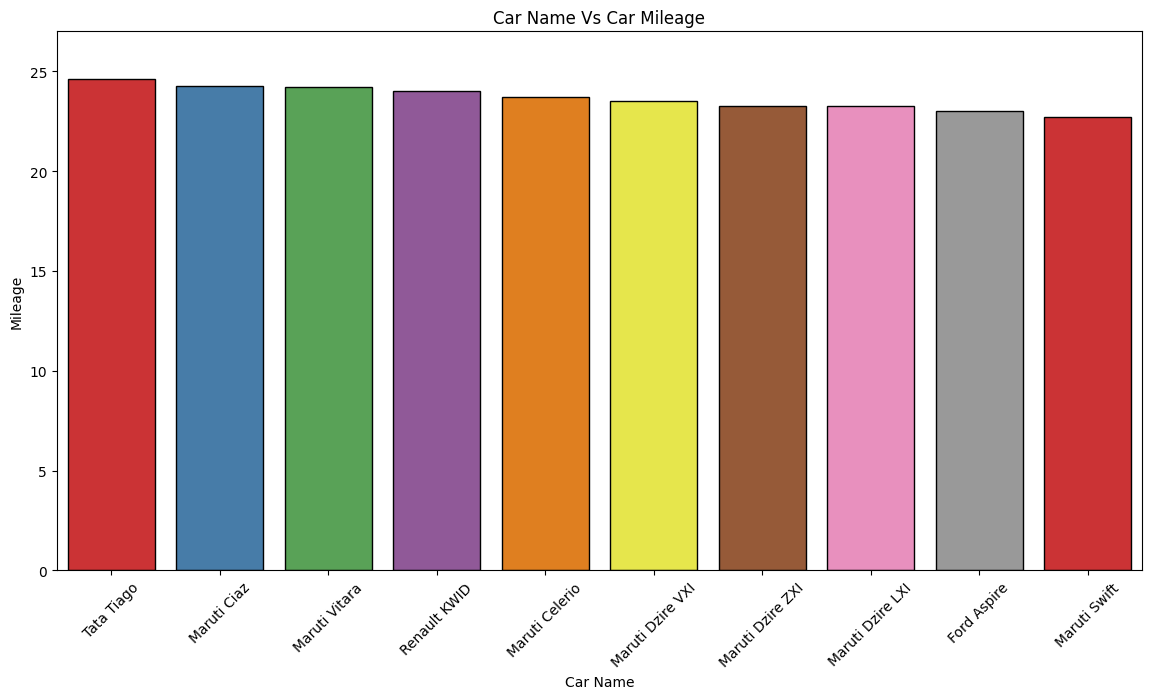

In [116]:
plt.subplots(figsize=(14, 7))
sns.barplot(x=car_mileage.index, y=car_mileage.values, ec = "black", palette="Set1")
plt.title("Car Name Vs Car Mileage")
plt.xlabel("Car Name")
plt.ylabel("Mileage")
plt.ylim(0, 27)
plt.xticks(rotation=45)
plt.show()

### Km driven Vs Selling Price

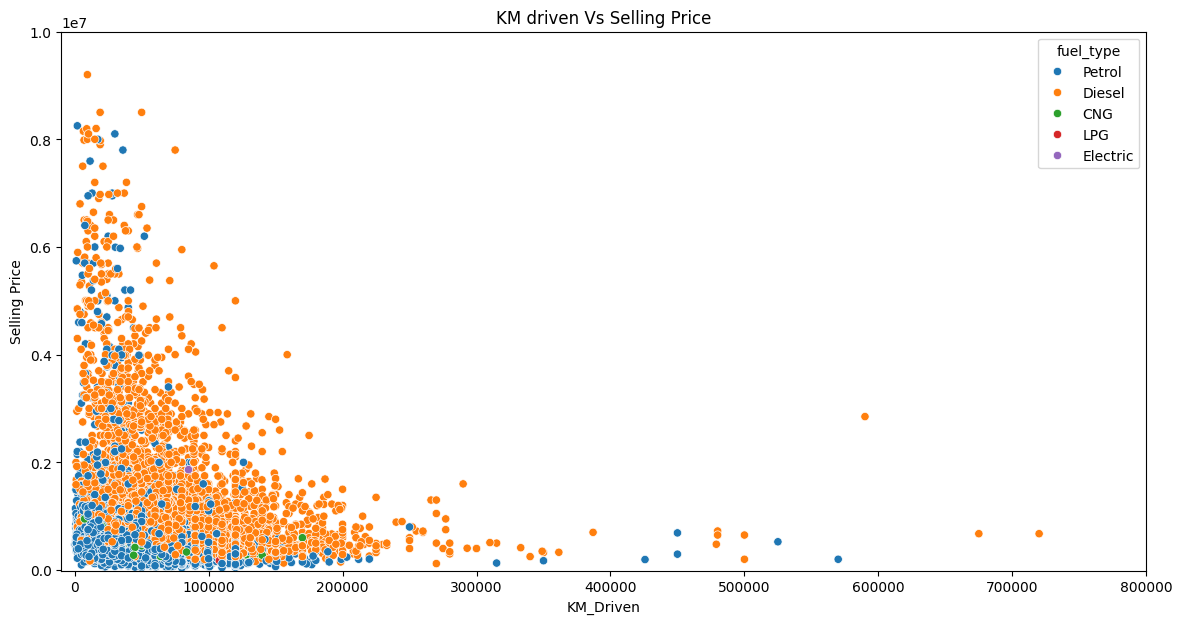

In [122]:
plt.subplots(figsize=(14, 7))
sns.scatterplot(x="km_driven", y="selling_price", data=df, ec="white", color='b', hue='fuel_type')
plt.title("KM driven Vs Selling Price")
plt.xlabel("KM_Driven")
plt.ylabel("Selling Price")
plt.xlim(-10000,800000)
plt.ylim(-10000,10000000)
plt.show()

**Report:**
 - Higher the kilometer lesser the selling price
 - Most cars are sold between 0-20k kms

### Selling price Vs Fuel Type

In [123]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


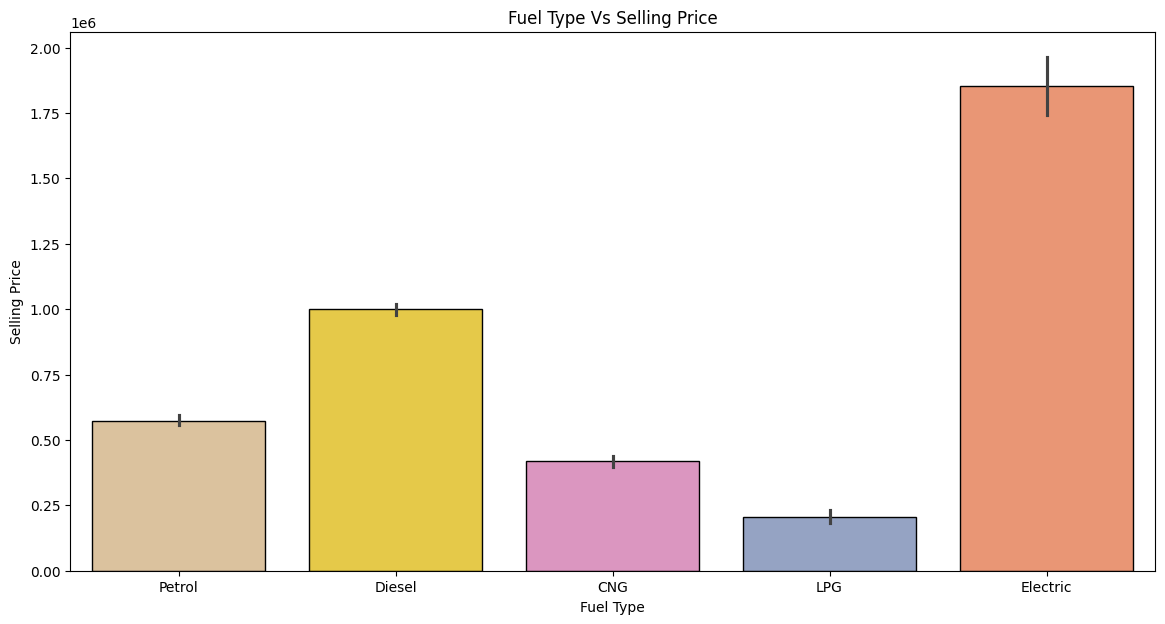

In [124]:
plt.subplots(figsize=(14,7))
sns.barplot(x=df['fuel_type'], y=df['selling_price'], ec="black", palette="Set2_r")
plt.title("Fuel Type Vs Selling Price")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

**Report**:

- Electric cars have highers selling average price.
- Followed by Diesel and Petrol.
- Fuel Type is also important feature for the Target variable.

### Most Sold Fuel Type

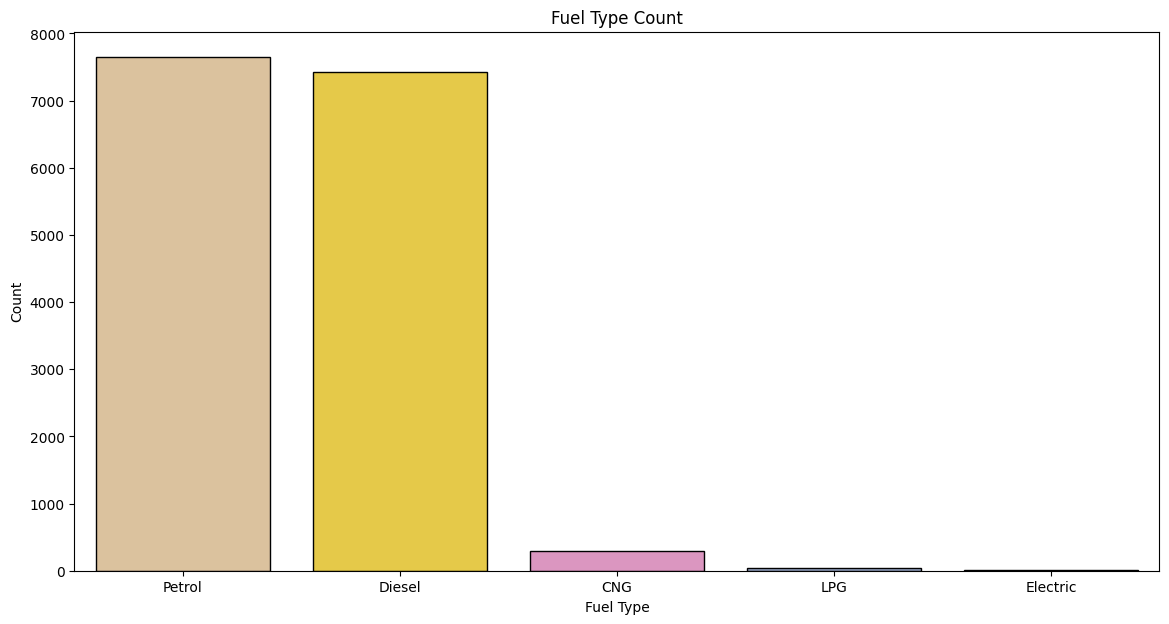

In [125]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df['fuel_type'], ec="black", palette="Set2_r")
plt.title("Fuel Type Count")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

### Mileage for each fuel type

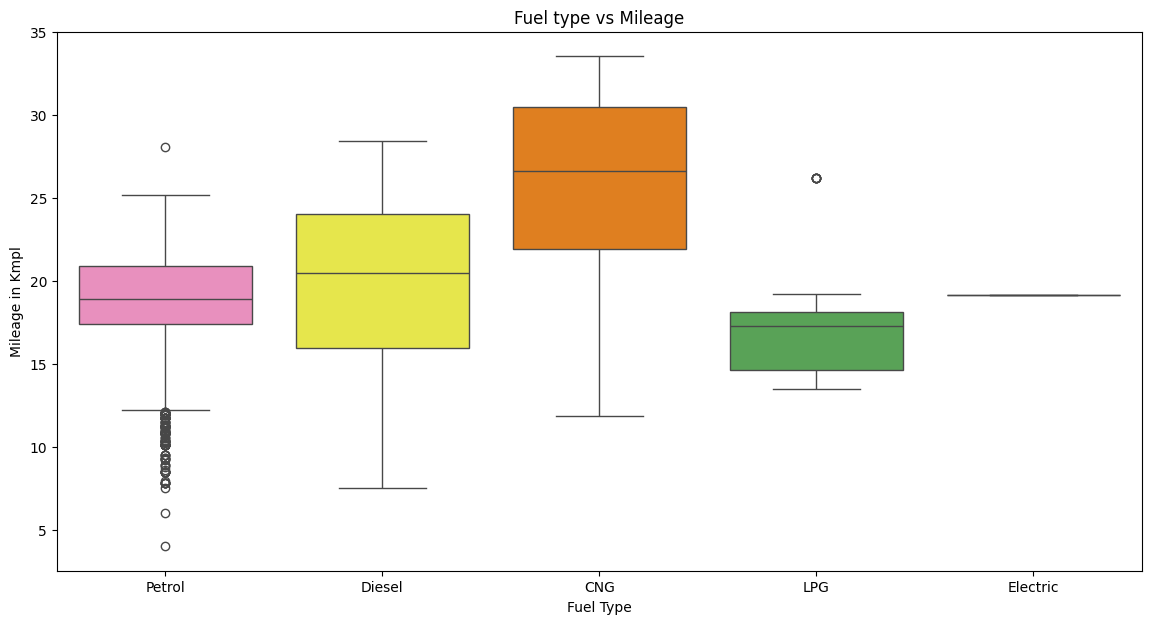

In [126]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage")
plt.ylabel("Mileage in Kmpl")
plt.xlabel("Fuel Type")
plt.show()

### Mileage Vs Selling price

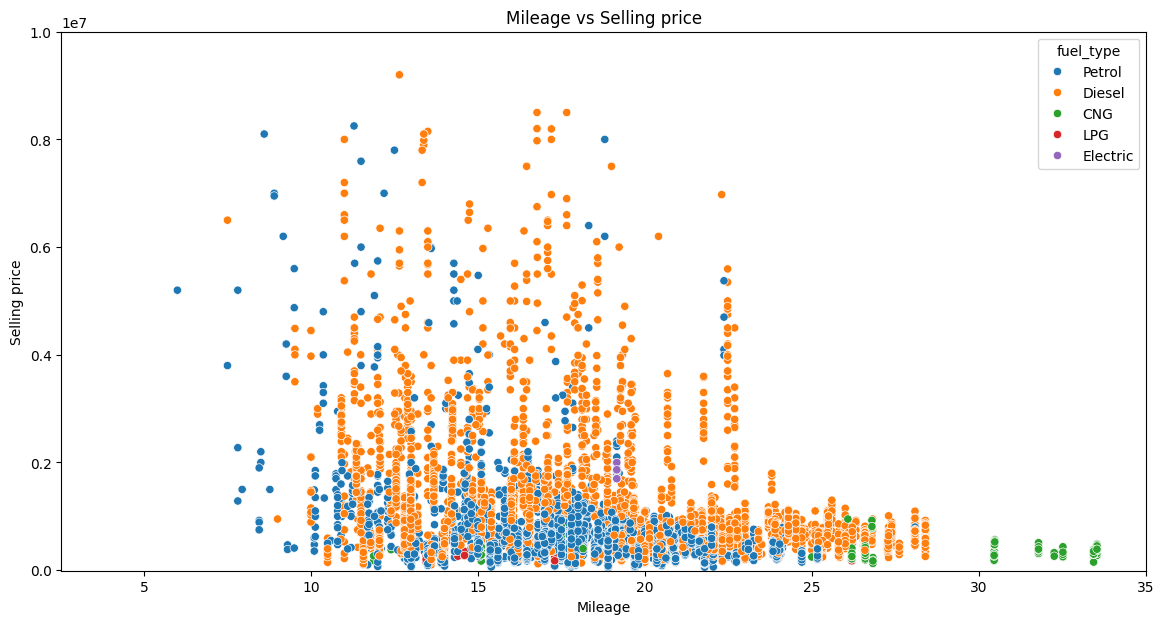

In [127]:
plt.subplots(figsize=(14, 7))
sns.scatterplot(x="mileage", y="selling_price", data=df, ec="white", color='b', hue='fuel_type')
plt.title("Mileage vs Selling price")
plt.xlabel("Mileage")
plt.ylabel("Selling price")
plt.ylim(-10000, 10000000)
plt.show()

### Mileage Distribution

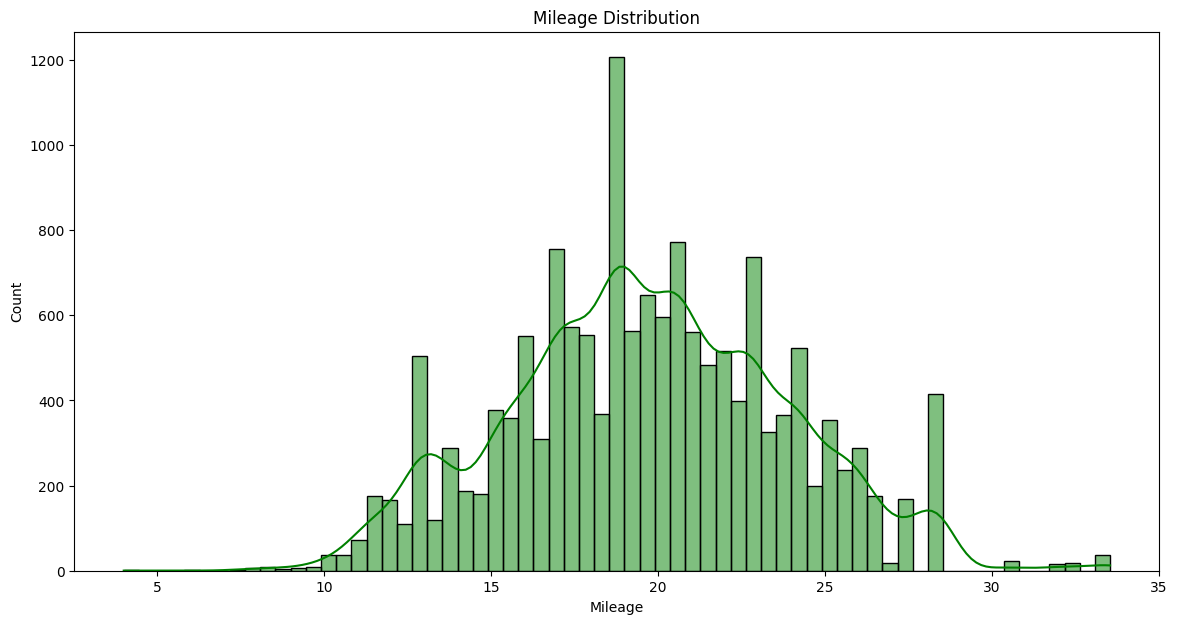

In [128]:
plt.subplots(figsize=(14, 7))
sns.histplot(x=df['mileage'], ec="black", color='g', kde=True)
plt.title("Mileage Distribution")
plt.ylabel("Count")
plt.xlabel("Mileage")
plt.show()

### Vehicle age Vs Selling price

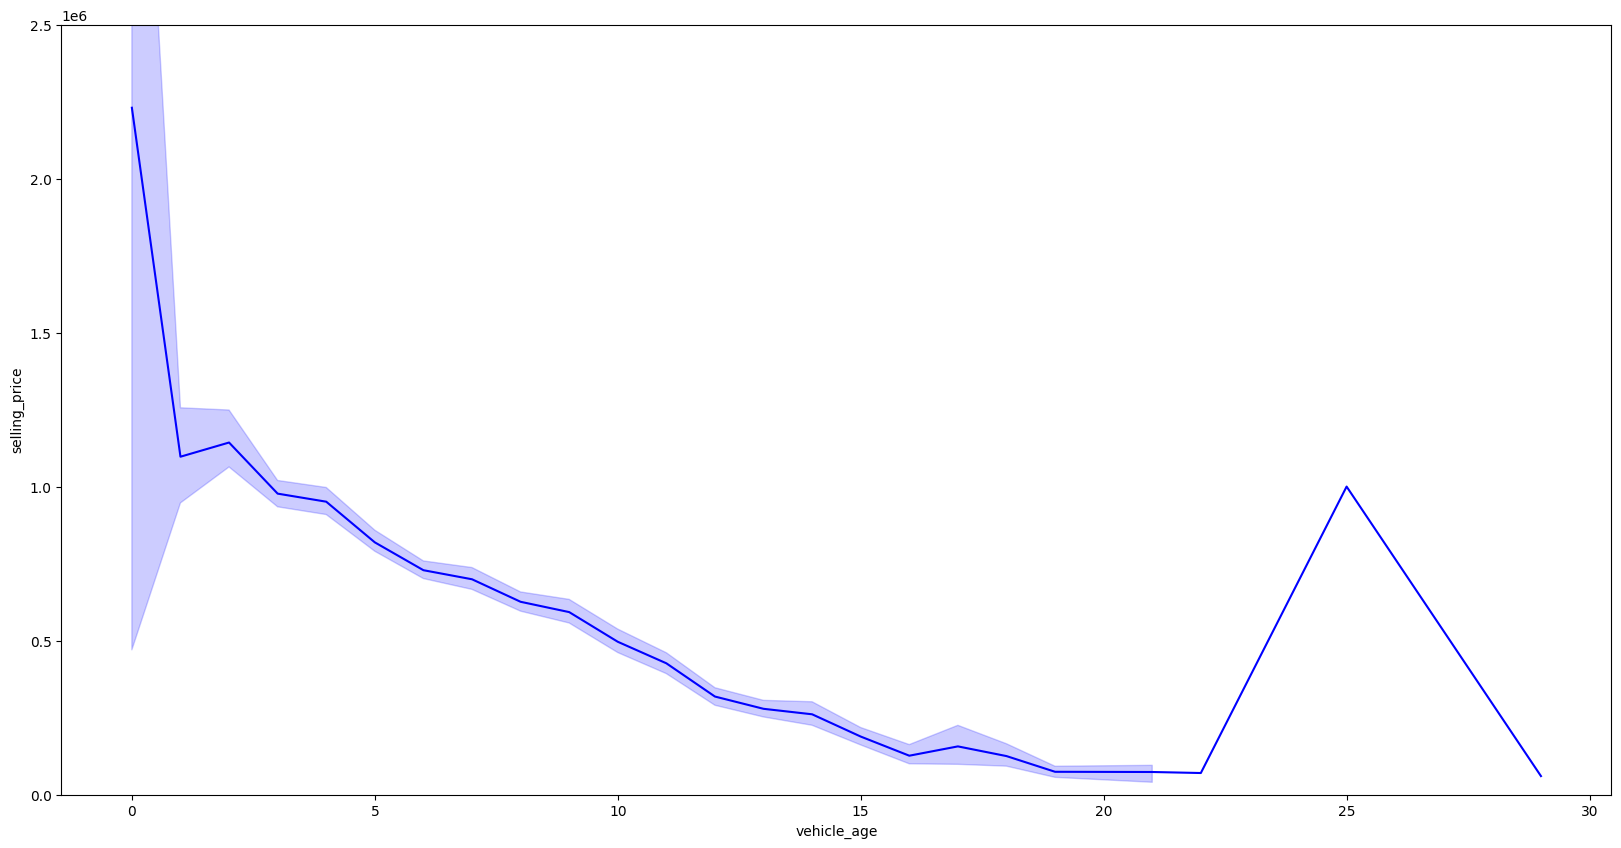

In [129]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

### Vehicle age vs Mileage

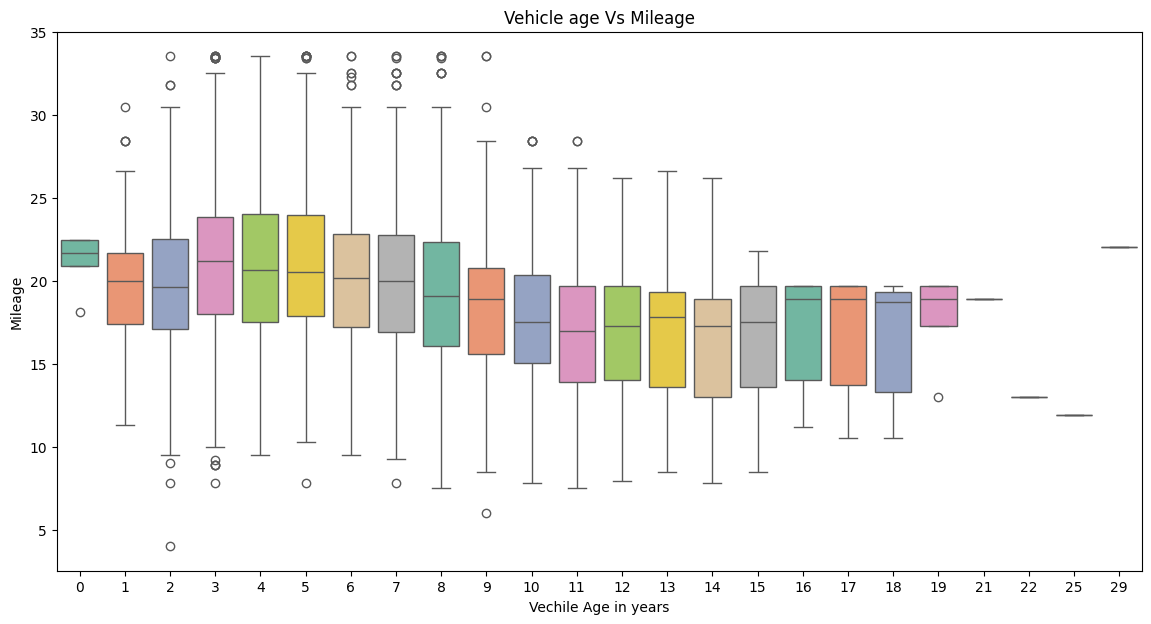

In [132]:
plt.subplots(figsize=(14, 7))
sns.boxplot(x="vehicle_age", y="mileage", data=df, palette="Set2")
plt.title("Vehicle age Vs Mileage")
plt.xlabel("Vechile Age in years")
plt.ylabel("Mileage")
plt.show()

**Report:**

 - As the Age of vehicle increases the median of mileage drops.
 - Newer Vehicles have more mileage median older vehicle.

In [134]:
oldest = df.groupby("car_name")['vehicle_age'].max().sort_values(ascending=False)[0:10]
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Scorpio,18
Mahindra Bolero,18
Skoda Octavia,18
Mercedes-Benz E-Class,17
Honda CR-V,17


## Transmission Type Vs Selling Price

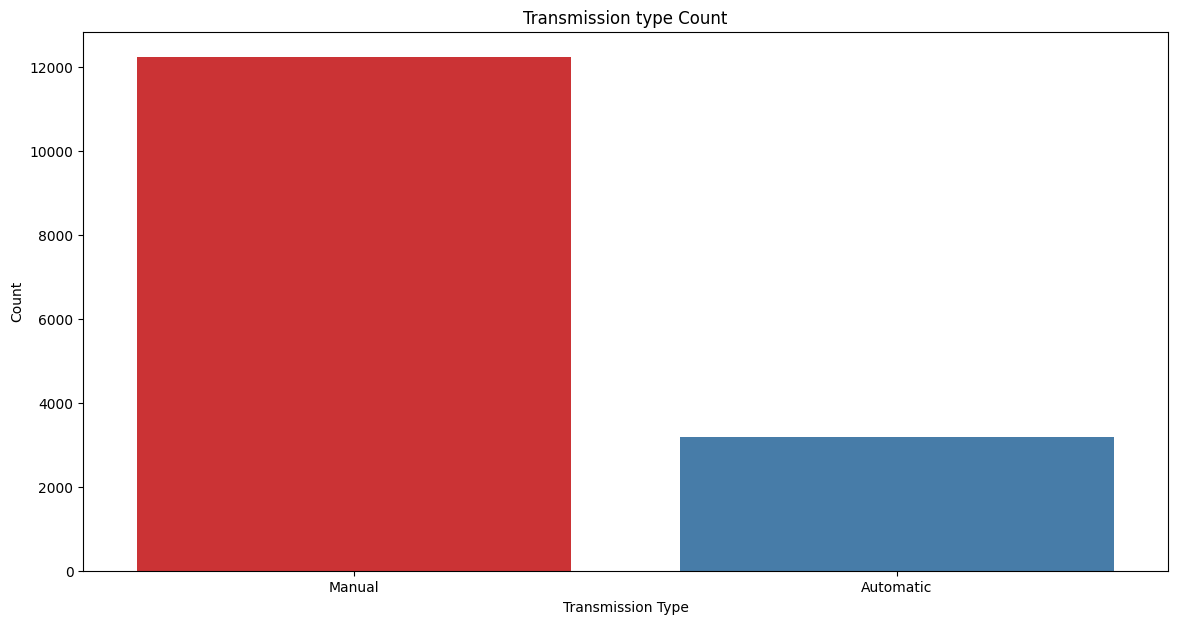

In [135]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission type Count")
plt.ylabel("Count")
plt.xlabel("Transmission Type")
plt.show() 

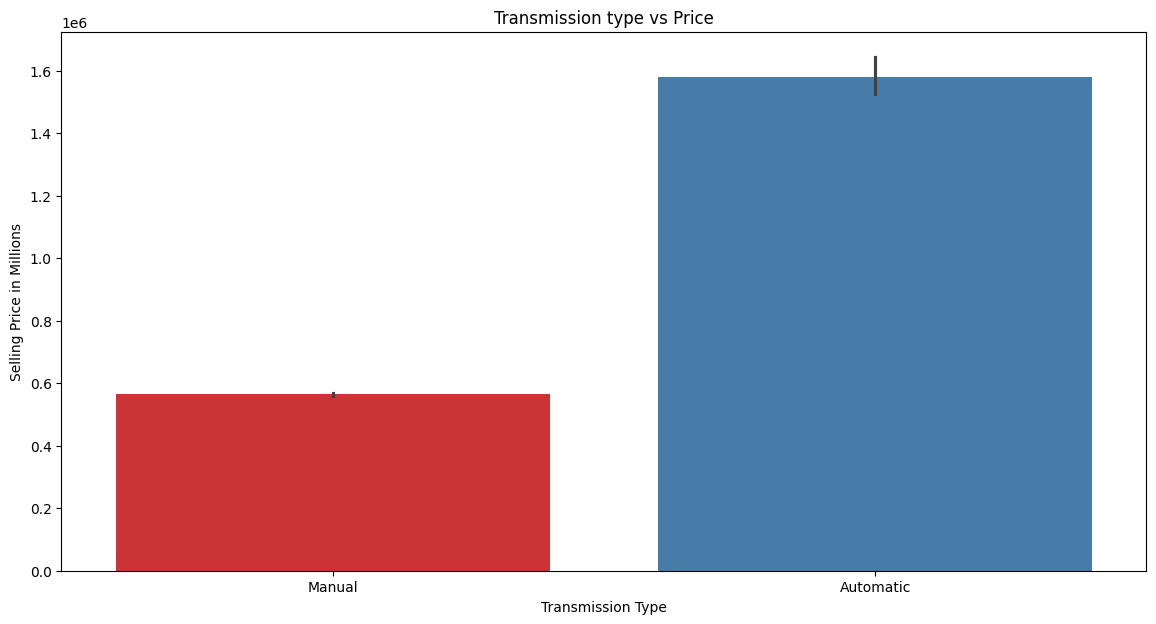

In [136]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price")
plt.ylabel("Selling Price in Millions")
plt.xlabel("Transmission Type")
plt.show() 

**Report:**

 - Manual Transmission was found in most of the cars which was sold.
 - Automatic cars have more selling price than manual cars.

### Seller Type Vs Sellin Price

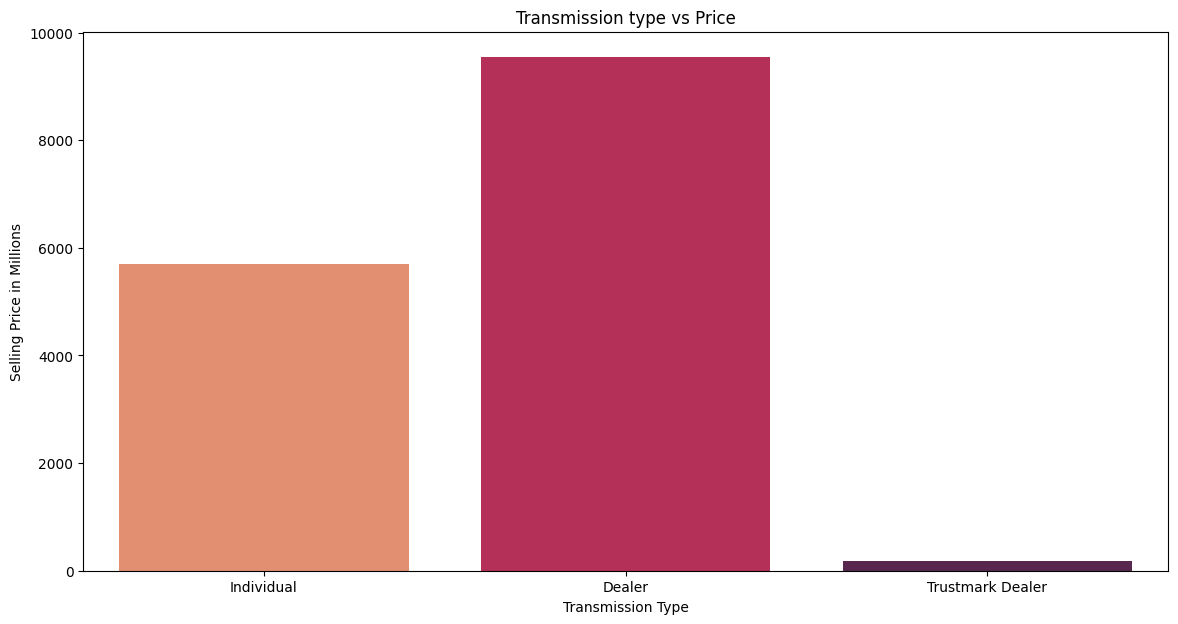

In [137]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Transmission type vs Price")
plt.ylabel("Selling Price in Millions")
plt.xlabel("Transmission Type")
plt.show() 

In [138]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


## Final Report
- There was 15411 rows and 13 columns in the dataset
- The `selling_price` column is the target to predict. [Regression Problem]
- There are outliers in the `km_driven`, `engine`, `selling_price`, and `max_power` features.
- Dealer `seller_type` are the highest sellers of the used cars.
- Skewness is found in few of the features will check it after handling outliers.
- `Vehicle_age` has negative impact on the price. (negative correlation)
- Manual cars are mostly sold and automatic cars has higher selling price average than manual cars.
- Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
- Less data cleaning required for this dataset.
- We can see from EDA that `Brand` and `Model` has same information as `carname`. Hence we can drop `brand` and model columns and retain `carname`.